In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data.
df = pd.read_csv('./raw/roc_curve/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=56)

In [3]:
# Fit a vanilla Logistic Regression classifier and make predictions.
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter = 1000)
clf.fit(X_train, y_train)

y_pred_test = clf.predict(X_test)

In [12]:
# Function to calculate TPR (True Positive Rate) and FPR (False Positive Rate)

def performance_eval(y_true, y_pred):
    
    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index = y_true.index)
    
    TP, FP, TN, FN = 0, 0, 0, 0
    
    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index:
        if y_true[i]==y_pred[i]==1:
            TP += 1
        if y_pred[i] == 1 and y_true[i]!=y_pred[i]:
            FP += 1
        if y_true[i]==y_pred[i]==0:
            TN += 1
        if y_pred[i]==0 and y_pred[i]!=y_true[i]:
            FN += 1
    
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    precision = TP / (TP + FP) if (TP+FP)!=0 else 1
    accuracy = (TP + TN) / len(y_pred)
    
    return TPR, FPR, precision, accuracy


performance_eval(y_test, y_pred_test)

(0.6923076923076923, 0.1891891891891892, 0.7941176470588235, 0.75)

In [13]:
lr = LogisticRegression(max_iter=1000, penalty='none')
lr.fit(X_train, y_train)
y_test_probs = lr.predict_proba(X_test)[:, 1]

lr_TPR = []
lr_FPR = []
lr_precision = []

pr_thresholds = np.linspace(0, 1, 100)

for p in pr_thresholds:
    
    y_test_preds = []
    
    for prob in y_test_probs:
        
        if prob > p:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)
            
    TPR, FPR, precision, _ = performance_eval(y_test, y_test_preds)
    
    lr_TPR.append(TPR)
    lr_FPR.append(FPR)
    lr_precision.append(precision)

C:\Users\MK9\.conda\envs\cv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train, y_train)

y_test_probs = svc.predict_proba(X_test)

In [16]:
svc_TPR = []
svc_FPR = []
svc_precision = []

for p in pr_thresholds:
    
    y_test_preds = []
    
    for prob in y_test_probs[:, 1]:
        
        if prob > p:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)
            
    TPR, FPR, precision, _ = performance_eval(y_test, y_test_preds)
    
    svc_TPR.append(TPR)
    svc_FPR.append(FPR)
    svc_precision.append(precision)

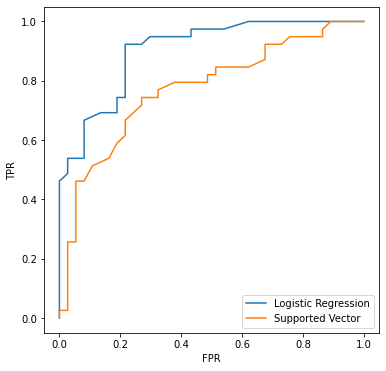

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(lr_FPR, lr_TPR, label='Logistic Regression')
ax.plot(svc_FPR, svc_TPR, label='Supported Vector')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.legend()

(0.0, 1.1)

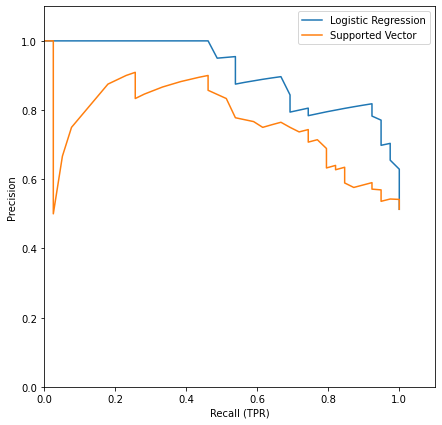

In [20]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(lr_TPR, lr_precision, label='Logistic Regression')
ax.plot(svc_TPR, svc_precision, label='Supported Vector')
ax.set_xlabel('Recall (TPR)')
ax.set_ylabel('Precision')
ax.legend()
ax.set_xlim([0, 1.1])
ax.set_ylim([0, 1.1])